# ETF Trend-Following Strategy Backtest Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from backtester import Backtester

## Load Data

In [2]:
# Load price data and convert dates
daily_prices = pd.read_csv('data/daily_prices.csv', parse_dates=['Date'])
weekly_prices = pd.read_csv('data/weekly_prices.csv', parse_dates=['Date'])

print(f"Data from {daily_prices['Date'].iloc[0]} to {daily_prices['Date'].iloc[-1]}")
daily_prices.head()

Data from 2015-05-07 00:00:00 to 2025-05-02 00:00:00


,Date,DBC,GLD,HYG,IEF,QQQ,SPY,TBF,TLT
0,2015-05-07,15.834916,113.419998,53.349209,86.461014,99.426552,175.737701,22.333660,94.427460
1,2015-05-08,15.922305,113.970001,53.768356,86.794449,100.667625,178.051453,22.246048,94.682487
2,2015-05-11,15.852395,113.529999,53.431881,85.940498,100.278671,177.201691,22.806795,92.379356
3,2015-05-12,16.018433,114.500000,53.425972,86.005569,99.824829,176.671600,22.736708,92.618965
4,2015-05-13,16.035912,116.550003,53.349209,85.891670,100.028603,176.705276,22.920698,91.877014


## Run Backtest

In [3]:
# Initialize and run backtest
bt = Backtester(daily_prices, weekly_prices)
bt.run_backtest(initial_capital=10000, rebalance_freq='W-FRI')

# Get performance metrics
metrics = bt.get_performance_metrics()
metrics

/Users/zettt/Coding/Finance/Systematic Low-Correlation ETF Trend Strategy/backtester.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peak = equity_curve[0]


{'strategy': {'CAGR': np.float64(0.08738911079921285),
  'Max Drawdown': 0.1497660850440096,
  'Sharpe Ratio': np.float64(0.876705258907562),
  'Peak Date': Timestamp('2025-04-21 00:00:00'),
  'Trough Date': Timestamp('2023-03-10 00:00:00')},
 'benchmark': {'CAGR': np.float64(0.12438788130608924),
  'Max Drawdown': 0.3371725258088329,
  'Sharpe Ratio': np.float64(0.7345001459117547)}}

## Performance Visualization

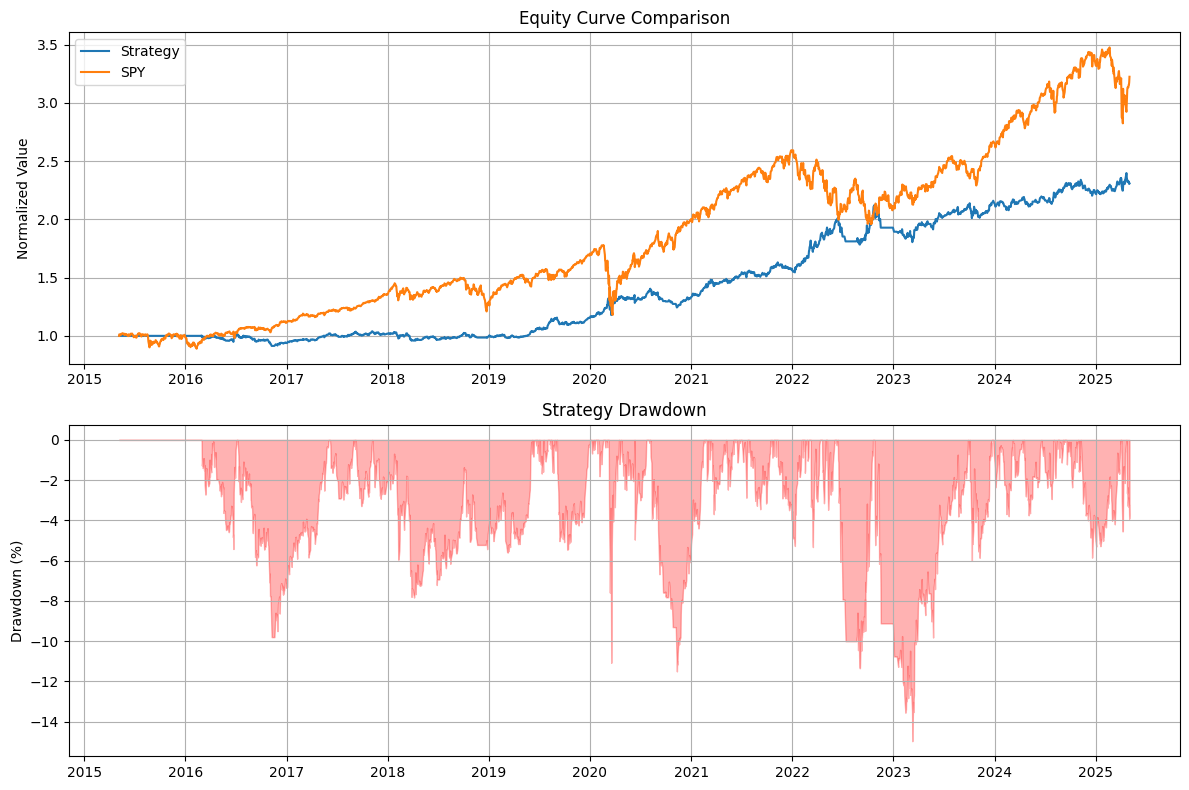

In [4]:
# Show equity curve and drawdown
fig = bt.plot_results()
plt.show()

## Trade Analysis

In [5]:
# Show trade history
print(bt.trades.head(10))
print(f'{len(bt.trades)} trades')

        date  etf     shares       price  type     reason
0 2016-02-26  TLT  48.672400  102.727623   buy  rebalance
1 2016-02-26  IEF  54.926446   91.030830   buy  rebalance
2 2016-03-04  GLD  27.347661  120.540001   buy  rebalance
3 2016-03-04  TLT -16.192789  101.494041  sell  rebalance
4 2016-03-04  IEF -18.344120   90.111465  sell  rebalance
5 2016-03-11  GLD  13.708450  119.410004   buy  rebalance
6 2016-03-11  TLT  16.294117  100.515388   buy  rebalance
7 2016-03-11  IEF -36.582327   89.516876  sell  rebalance
8 2016-03-18  GLD -13.547842  119.800003  sell  rebalance
9 2016-03-18  TLT -16.419665  101.857086  sell  rebalance
1352 trades


## Performance Summary

In [6]:
def print_metrics(metrics):
    print("Strategy Performance:")
    print(f"  CAGR: {metrics['strategy']['CAGR']:.1%}")
    print(f"  Max Drawdown: {metrics['strategy']['Max Drawdown']:.1%}")
    print(f"  Sharpe Ratio: {metrics['strategy']['Sharpe Ratio']:.2f}")
    print(f"  Peak: {metrics['strategy']['Peak Date']}")
    print(f"  Trough: {metrics['strategy']['Trough Date']}")
    
    print("\nSPY Benchmark:")
    print(f"  CAGR: {metrics['benchmark']['CAGR']:.1%}")
    print(f"  Max Drawdown: {metrics['benchmark']['Max Drawdown']:.1%}")
    print(f"  Sharpe Ratio: {metrics['benchmark']['Sharpe Ratio']:.2f}")

print_metrics(metrics)

Strategy Performance:
  CAGR: 8.7%
  Max Drawdown: 15.0%
  Sharpe Ratio: 0.88
  Peak: 2025-04-21 00:00:00
  Trough: 2023-03-10 00:00:00

SPY Benchmark:
  CAGR: 12.4%
  Max Drawdown: 33.7%
  Sharpe Ratio: 0.73
